In [10]:
import cNoise
import numpy as np
import matplotlib.pyplot as plt

# Plot dos ruidos clássicos

In [58]:
def getHistogramSlices(mat):
    freq = np.fft.fftfreq(mat.shape[0])
    p = (freq > 1e-12)
    betas= []
    for i in range(mat.shape[0]):
        psd = np.fft.fft(mat[i])
        psd = (psd*np.conj(psd)).real
        b,_ = np.polyfit(np.log(freq[p]),np.log(psd[p]),deg=1)
        betas.append(-b)
    for i in range(mat.shape[1]):
        psd = np.fft.fft(mat[:,i])
        psd = (psd*np.conj(psd)).real
        b,_ = np.polyfit(np.log(freq[p]),np.log(psd[p]),deg=1)
        betas.append(-b)
    return betas
        

Best decay constant: 1.4142135623730951  Error:  0.004405943709130831
Noise error -  0.2679831895086532
Noise error -  0.24823178780585797
Noise error -  0.22986936771707334
Noise error -  0.21279635924783724
Noise error -  0.19692184139256197
Noise error -  0.18182006405586137
Noise error -  0.1677447836162671
Noise error -  0.1546837088859171
Noise error -  0.1426089204393738
Noise error -  0.13147823235225164
Noise error -  0.1212204929751477
Noise error -  0.11176520254580247
Noise error -  0.10304218541438204
Noise error -  0.0949712227707854
Noise error -  0.08749180096211195
Noise error -  0.08058355801379002
Noise error -  0.07421708880641864
Noise error -  0.06835273980161305
Noise error -  0.06295105526053835
Noise error -  0.05797546901143036
Noise error -  0.05339250920715255
Noise error -  0.04917152279060999
Noise error -  0.04528435556723531
Noise error -  0.041705080179679443
Noise error -  0.03840978039774967
Noise error -  0.03537637743603694
Noise error -  0.03258448

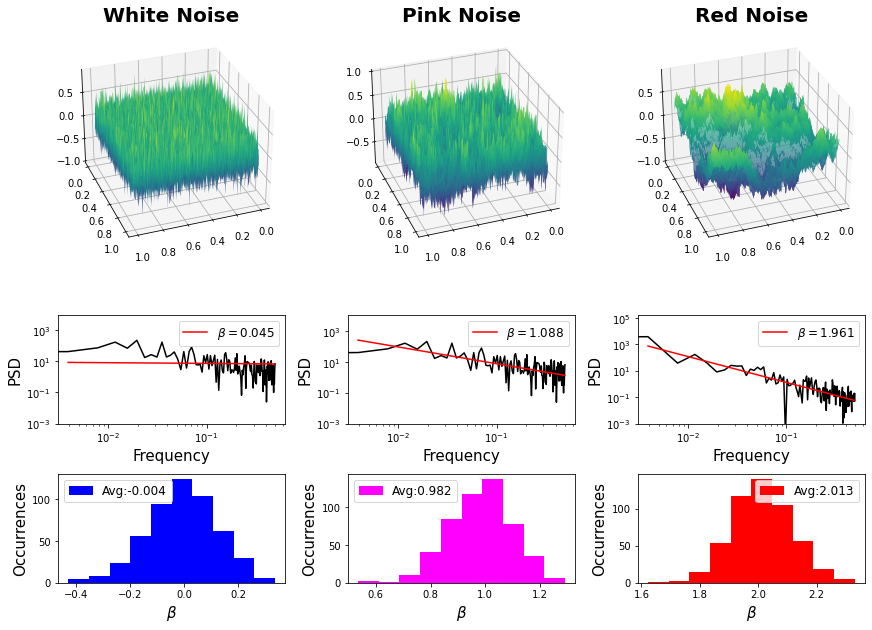

In [62]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import noise
import cNoise
import matplotlib.gridspec as gridspec


titleSize = 20
labelSize = 15
roundDecimals = 3
legendSize = 12
size = 256

############################################################
# Generating Noise
wn = cNoise.cNoise(0,(size,size),maxCorrections=20,maxAvgError=0.005, eta=0.1)
wnSlice = wn[:,size//2].copy()

pn = cNoise.cNoise(1,(size,size),maxCorrections=30,maxAvgError=0.005, eta=0.1)
pnSlice = pn[:,size//2].copy()

rn = cNoise.cNoise(2,(size,size),maxCorrections=30,maxAvgError=0.005, eta=0.1)
rnSlice = rn[:,size//2].copy()


##########################################################
# Generating PSD

wnPSD = np.fft.fft(wnSlice)
wnPSD = (wnPSD*np.conj(wnPSD)).real

pnPSD = np.fft.fft(pnSlice)
pnPSD = (pnPSD*np.conj(pnPSD)).real

rnPSD = np.fft.fft(rnSlice)
rnPSD = (rnPSD*np.conj(rnPSD)).real


freqs = np.fft.fftfreq(size)

seq = np.argsort(freqs)
freqs = freqs[seq]
wnPSD = wnPSD[seq]
pnPSD = pnPSD[seq]
rnPSD = rnPSD[seq]

#########################################################
# Fitting PSD
ffreq = freqs[freqs>1e-15]
cwn = np.polyfit(np.log(ffreq),np.log(wnPSD[freqs>1e-15]),deg=1)
cpn = np.polyfit(np.log(ffreq),np.log(pnPSD[freqs>1e-15]),deg=1)
crn = np.polyfit(np.log(ffreq),np.log(rnPSD[freqs>1e-15]),deg=1)

fwn = np.exp(np.polyval(cwn,np.log(ffreq)))
fpn = np.exp(np.polyval(cpn,np.log(ffreq)))
frn = np.exp(np.polyval(crn,np.log(ffreq)))

##########################################################
# Generating histogram of betas
wnHist = getHistogramSlices(wn)
pnHist = getHistogramSlices(pn)
rnHist = getHistogramSlices(rn)

##########################################################
# Plot
x,y = np.meshgrid(np.linspace(0,1,size),np.linspace(0,1,size))
x,y = x.reshape(size*size),y.reshape(size*size)

fig = plt.figure(figsize=(12,9),constrained_layout=True)

spec2 = gridspec.GridSpec(ncols=3, nrows=3, figure=fig, height_ratios=[3,1,1])

# White Noise
ax = fig.add_subplot(spec2[0, 0], projection='3d')
ax.plot_trisurf(x,y,wn.reshape(size*size),cmap=plt.cm.viridis)
ax.set_title("White Noise",fontsize=titleSize,fontweight="bold")
ax.view_init(30,70)

ax = fig.add_subplot(spec2[1, 0])
ax.loglog(freqs,pnPSD,color='k')
ax.loglog(ffreq,fwn,label=r"$\beta=$"+str(np.round(-cwn[0],roundDecimals)),color='red')
ax.set_ylim(1e-3)
plt.legend(fontsize=legendSize)
ax.set_xlabel("Frequency",fontsize = labelSize)
ax.set_ylabel("PSD",fontsize = labelSize)

ax = fig.add_subplot(spec2[2, 0])
ax.hist(wnHist,color='blue',label="Avg:"+str(np.round(np.average(wnHist),roundDecimals)) )
plt.legend(fontsize=legendSize)
ax.set_xlabel(r"$\beta$",fontsize = labelSize)
ax.set_ylabel("Occurrences",fontsize = labelSize)

# Pink Noise
ax = fig.add_subplot(spec2[0, 1], projection='3d')
ax.set_title("Pink Noise",fontsize=titleSize,fontweight="bold")
ax.plot_trisurf(x,y,pn.reshape(size*size),cmap=plt.cm.viridis)
ax.view_init(30,70)

ax = fig.add_subplot(spec2[1, 1])
ax.loglog(freqs,pnPSD,color='k')
ax.loglog(ffreq,fpn,label=r"$\beta=$"+str(np.round(-cpn[0],roundDecimals)),color='red')
ax.set_ylim(1e-3)
plt.legend(fontsize=legendSize)
ax.set_xlabel("Frequency",fontsize = labelSize)
ax.set_ylabel("PSD",fontsize = labelSize)

ax = fig.add_subplot(spec2[2, 1])
ax.hist(pnHist,color='magenta',label="Avg:"+str(np.round(np.average(pnHist),roundDecimals)) )
plt.legend(fontsize=legendSize)
ax.set_xlabel(r"$\beta$",fontsize = labelSize)
ax.set_ylabel("Occurrences",fontsize = labelSize)


# Red Noise
ax = fig.add_subplot(spec2[0, 2], projection='3d')
ax.set_title("Red Noise",fontsize=titleSize,fontweight="bold")
ax.plot_trisurf(x,y,rn.reshape(size*size),cmap=plt.cm.viridis)
ax.view_init(30,70)

ax = fig.add_subplot(spec2[1, 2])
ax.loglog(freqs,rnPSD,color='k')
ax.loglog(ffreq,frn,label=r"$\beta=$"+str(np.round(-crn[0],roundDecimals)),color='red')
ax.set_ylim(1e-3)
plt.legend(fontsize=legendSize)
ax.set_xlabel("Frequency",fontsize = labelSize)
ax.set_ylabel("PSD",fontsize = labelSize)

ax = fig.add_subplot(spec2[2, 2])
ax.hist(rnHist,color='red',label="Avg:"+str(np.round(np.average(rnHist),roundDecimals)) )
plt.legend(fontsize=legendSize)
ax.set_xlabel(r"$\beta$",fontsize = labelSize)
ax.set_ylabel("Occurrences",fontsize = labelSize)

plt.show()

# Teste para $\beta \geq 3$

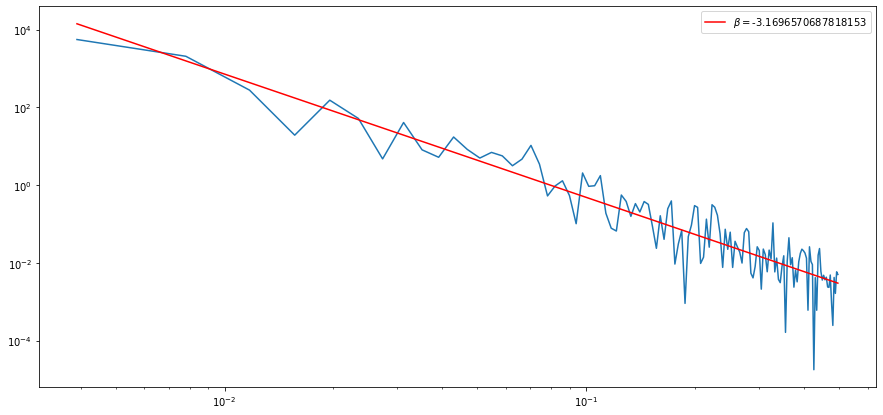

In [2]:
mat = cNoise.cNoise(3,(256,),eta=0.1)
mat = mat/np.max(np.abs(mat))

series = mat
psd = np.fft.fft(series)
psd = np.real(psd*np.conj(psd))
freqs = np.fft.fftfreq(len(series))
fPSD = psd[freqs>0.0]
fFreqs = freqs[freqs>0.0]

fit = np.polyfit(np.log(fFreqs),np.log(fPSD),deg=1)

plt.figure(figsize=(15,7))
plt.loglog(fFreqs,fPSD)
plt.loglog(fFreqs,np.exp(np.polyval(fit,np.log(fFreqs))),color='r',label=r"$\beta = $"+str(fit[0]))
plt.legend()
plt.show()